In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./data/mercedes_benz_sales_2020_2025.csv')
data.head()

,Model,Year,Region,Color,Fuel Type,Base Price (USD),Horsepower,Sales Volume,Turbo
0,A-Class,2020,Global,Yellow,Diesel,41265,252,1,Yes
1,A-Class,2020,Global,Black,Petrol,51023,249,1,No
2,A-Class,2020,Global,Grey,Petrol,72819,341,1,Yes
3,A-Class,2020,Global,Black,Petrol,62480,385,1,Yes
4,A-Class,2020,Global,White,Petrol,35189,337,1,Yes


<Axes: >

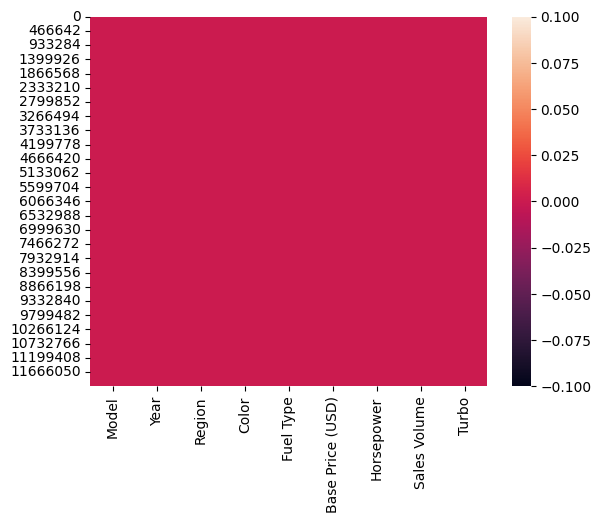

In [5]:
#Check if missing values
sns.heatmap(data.isnull())

In [6]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132666 entries, 0 to 12132665
Data columns (total 9 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Model             object
 1   Year              int64 
 2   Region            object
 3   Color             object
 4   Fuel Type         object
 5   Base Price (USD)  int64 
 6   Horsepower        int64 
 7   Sales Volume      int64 
 8   Turbo             object
dtypes: int64(4), object(5)
memory usage: 833.1+ MB


In [12]:
data.Model.value_counts()

Model
GLC         2091045
A-Class     1618309
GLE         1546092
C-Class     1504928
E-Class     1219554
GLA         1129266
GLB          883773
CLA          564731
GLS          493201
S-Class      374553
G-Class      217179
CLS          138621
AMG A 45     103309
AMG C 63      83158
AMG GT        65720
AMG E 63      53725
AMG S 63      45502
Name: count, dtype: int64

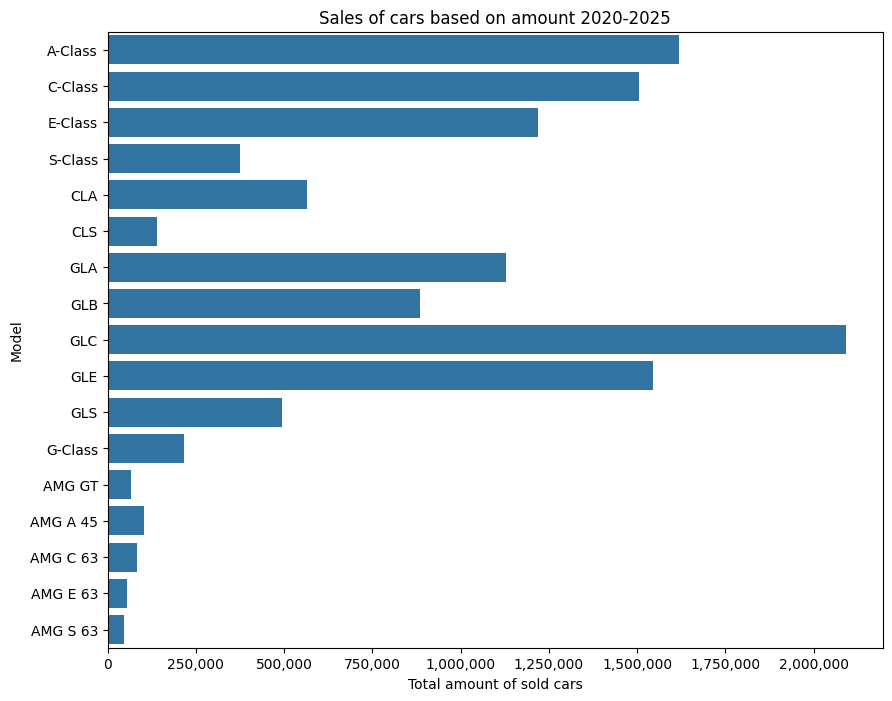

In [20]:
#Graph per model
import matplotlib.ticker as mticker
from numpy import integer

ax = plt.figure(figsize=(10,8))
ax = plt.gca()

sns.countplot(data, y='Model')
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"{int(x):,}")
)
plt.xlabel('Total amount of sold cars')
plt.title('Sales of cars based on amount 2020-2025')
plt.show()

In [ ]:
year_2020 = data[data['Year'] == 2020]
year_2021 = data[data['Year'] == 2021]
year_2022 = data[data['Year'] == 2022]
year_2023 = data[data['Year'] == 2023]
year_2024 = data[data['Year'] == 2024]
year_2025 = data[data['Year'] == 2025]

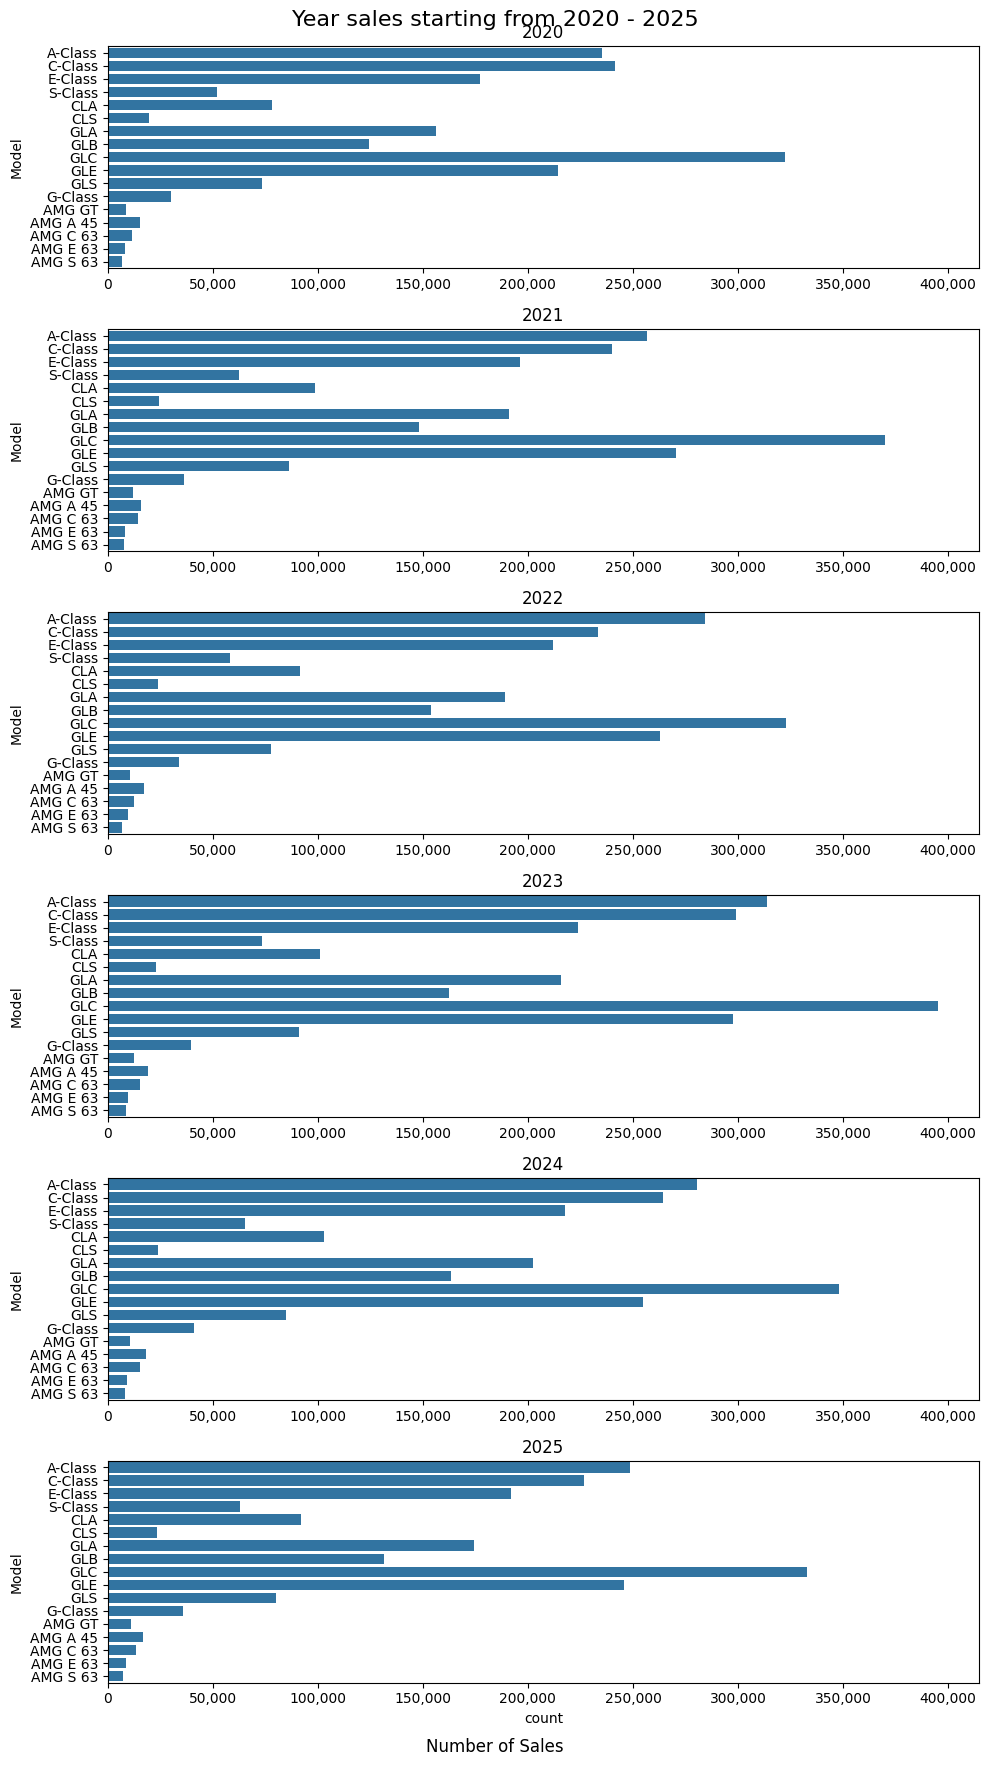

In [32]:
fig, axs = plt.subplots(6, 1, figsize=(10, 18), sharex=True)

fig.suptitle('Year sales starting from 2020 - 2025', fontsize=16)

years_data = [
    (2020, year_2020),
    (2021, year_2021),
    (2022, year_2022),
    (2023, year_2023),
    (2024, year_2024),
    (2025, year_2025),
]

for ax, (year, df_year) in zip(axs, years_data):
    sns.countplot(data=df_year, y='Model', ax=ax)
    ax.set_title(str(year))

    ax.tick_params(axis='x', labelbottom=True)

    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    ax.xaxis.set_major_formatter(
        mticker.FuncFormatter(lambda x, _: f"{int(x):,}")
    )

fig.supxlabel("Number of Sales")
plt.tight_layout()
plt.show()


In [33]:
data['Fuel Type'].value_counts()

Fuel Type
Petrol      5821366
Diesel      2571699
Hybrid      2374855
Electric    1364746
Name: count, dtype: int64

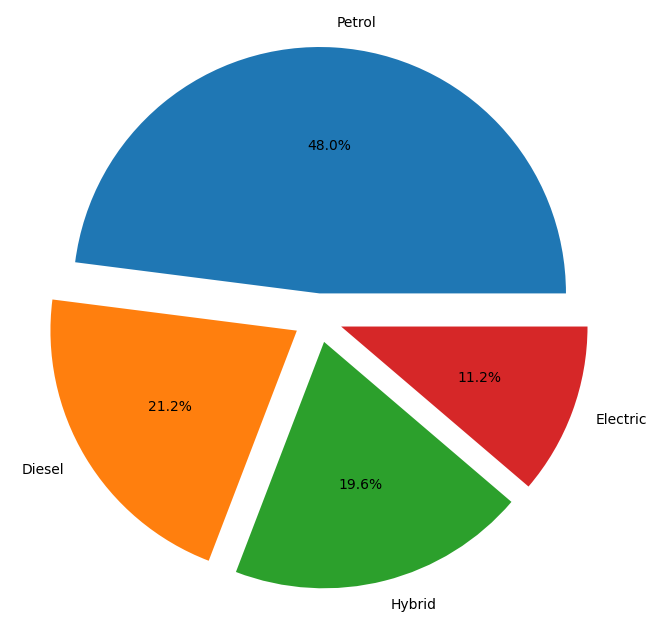

In [40]:
#Split via engine

counts = data['Fuel Type'].value_counts()

explode = (0.1,0.1,0.1,0.1)

plt.figure(figsize=(10,8))
plt.pie(counts.values, labels=counts.index, explode=explode, autopct='%1.1f%%')
plt.show()

In [ ]:
yearly_sales_by_fuel = 